In [2]:

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


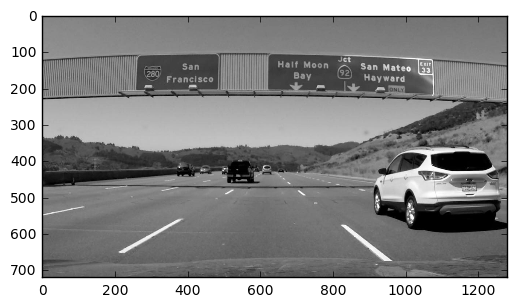

In [3]:
img = cv2.imread('images/sanfran.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')


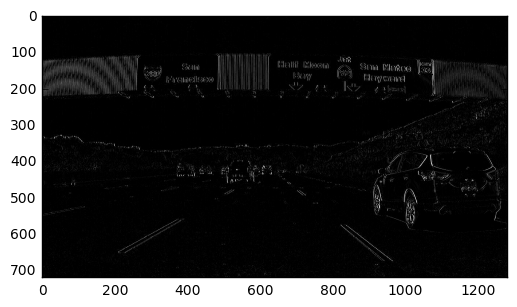

In [5]:
#calc derivative in x direction - will result in vertical lines
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
abs_sobelx = np.absolute(sobelx)

#Convert the absolute value image to 8-bit:
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
plt.imshow(scaled_sobel, cmap='gray')

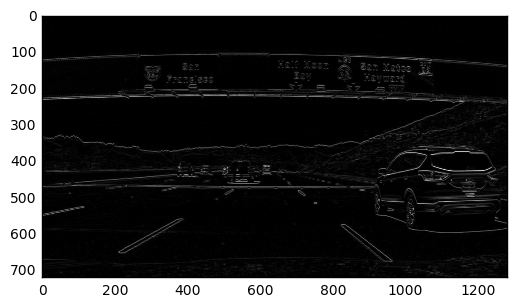

In [6]:
# y direction - horz lines
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
abs_sobely = np.absolute(sobely)

#Convert the absolute value image to 8-bit:
scaled_sobely = np.uint8(255*abs_sobely/np.max(abs_sobely))
plt.imshow(scaled_sobely, cmap='gray')

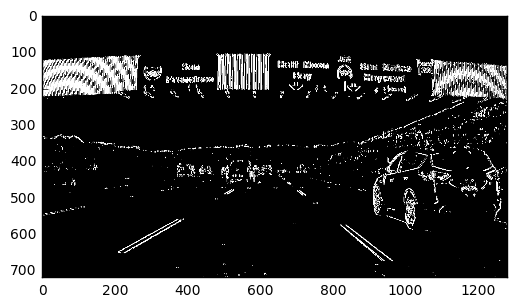

In [7]:
#Create a binary threshold to select pixels based on gradient strength:
thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
plt.imshow(sxbinary, cmap='gray')

In [8]:
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    if orient == 'x':
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    elif orient == 'y':
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
        
    abs_sobelx = np.absolute(sobelx)
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    thresh_min = thresh_min
    thresh_max = thresh_max
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return sxbinary
    

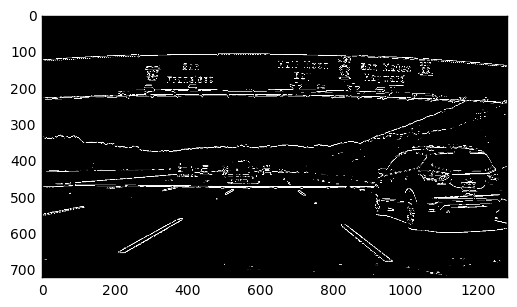

In [11]:
img = cv2.imread('images/sanfran.jpg')
img = abs_sobel_thresh(img, 'y', 40, 100)
plt.imshow(img, cmap='gray')